In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [41]:
import pandas as pd # manejo de Data Frame en Python
import numpy as np
#Librería de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Data description

* People

  -  ID: Customer's unique identifier
  -  Year_Birth: Customer's birth year
  -  Education: Customer's education level
  -  Marital_Status: Customer's marital status
  -  Income: Customer's yearly household income
  -  Kidhome: Number of children in customer's household
  -  Teenhome: Number of teenagers in customer's household
  -  Dt_Customer: Date of customer's enrollment with the company
  -  Recency: Number of days since customer's last purchase
  -  Complain: 1 if the customer complained in the last 2 years, 0 otherwise

* Products

  - MntWines: Amount spent on wine in last 2 years

  - MntFruits: Amount spent on fruits in last 2 years

  - MntMeatProducts: Amount spent on meat in last 2 years

  - MntFishProducts: Amount spent on fish in last 2 years

  - MntSweetProducts: Amount spent on sweets in last 2 years
  
  - MntGoldProds: Amount spent on gold in last 2 years

* Promotion
  
  - NumDealsPurchases: Number of purchases made with a discount
  
  - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

  - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

  - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

  - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

  - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

  - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place
  - NumWebPurchases: Number of purchases made through the company’s website
  - NumCatalogPurchases: Number of purchases made using a catalogue
  - NumStorePurchases: Number of purchases made directly in stores
  - NumWebVisitsMonth: Number of visits to company’s website in the last month


---


In [5]:
path= "/content/drive/MyDrive/ESTUDIO/UNI/OCTAVO SEMESTRE/Aprendizaje no supervisado/marketing_campaign.csv" # Colocar la ubicación del archivo
datos= pd.read_csv(path,sep="\t") # Creamos el dataframe con los datos
datos.head(10) #Visualizamos los datos, 10 primera filas

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


# Technical summary

1. Se realizo la eliminación de 24 registrosque contaban con valores nulos.

# Descriptive analysis

## Univariable analysis

In [6]:
# Contar los datos faltantes por variable
datos_faltantes = datos.isna().sum()
datos_faltantes

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
# Eliminar filas con al menos un valor faltante
df_sin_faltantes = datos.dropna()

### Promotions

Gasto promedio en cada categoria de producto:

* El numero total de campañas aceptadas es 667.

In [8]:
#Sacamos el numnero total de campañas aceptadas
num_Camp_aceptadas = 0  # Inicializar el contador

for columna in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    num_Camp_aceptadas += datos[columna].sum()  # Sumar los valores True (1) de cada columna

print("El número total de campañas aceptadas fue:", num_Camp_aceptadas)

El número total de campañas aceptadas fue: 667


In [9]:
promedio= datos[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].mean()
usuarios= datos[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum()
data= pd.DataFrame({'Usuarios':usuarios,'prom_acept':promedio })
data

,Usuarios,prom_acept
AcceptedCmp1,144,0.064286
AcceptedCmp2,30,0.013393
AcceptedCmp3,163,0.072768
AcceptedCmp4,167,0.074554
AcceptedCmp5,163,0.072768


Gasto promedio en las categorias seleccionadas x campaña

In [10]:
camp= ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',"Response"] # Lista con todas las campañas
results = [] # Se crea una lista vacia para guardar los resultados del for
col_sel= ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] # categorias de gasto seleccionadas
camp= ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',"Response"] # Lista con todas las campañas
results = [] # Se crea una lista vacia para guardar los resultados del for
col_sel= ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] # categorias de gasto seleccionadas

for i in camp: # Se crea un ciclo for que va a recorrer todos los elementos de la lista camp y va a ejecutar el siguiente codigo
  datos_fil= datos[datos[i] == 1] # Se filtra la informacion de los datos, seleccionando solo las filas donde el valor de la columna i sea igual a 1
  datos_fil_mean = datos_fil[col_sel].mean() # Calcula la media de todos de las categorias seleccionadas en los datos filtrados para la categoria de i
  results.append(datos_fil_mean) # los valores calculados se agregan a results

df_results = pd.concat(results, axis=1) # Se crea una dataframe concatenando los resultados que se fueron guardando en la lista results
# axis=1, garantiza que se vayan combinando por columnas
df_results.columns = camp # Asigna los nombres de las campañas a las columnas del dataframe
df_results = pd.concat(results, axis=1) # Se crea una dataframe concatenando los resultados que se fueron guardando en la lista results
# axis=1, garantiza que se vayan combinando por columnas
df_results.columns = camp # Asigna los nombres de las campañas a las columnas del dataframe

In [11]:
df_results

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
MntWines,758.604167,898.666667,378.656442,746.520958,871.668712,502.703593
MntFruits,55.847222,22.966667,28.392638,27.724551,56.938650,38.203593
MntMeatProducts,433.638889,250.300000,181.668712,248.772455,468.036810,294.353293
MntFishProducts,91.861111,38.733333,37.595092,40.766467,76.435583,52.050898
MntSweetProducts,65.138889,30.600000,27.288344,31.227545,65.306748,38.634731
MntGoldProds,77.131944,66.400000,66.938650,48.113772,77.723926,61.446108


Gastos por categoria independiente de si acepta las promoción o no.

In [12]:
df_resumen = datos.groupby(['AcceptedCmp1']).agg(
    promedio_wines=('MntWines', "mean"),
    promedio_fruits=('MntFruits', "mean"),
    promedio_meat=('MntMeatProducts', "mean"),
    promedio_fish=('MntFishProducts', "mean"),
    promedio_sweet=('MntSweetProducts', "mean"),
    promedio_gold=('MntGoldProds', "mean")
).reset_index()

In [13]:
df_resumen

,AcceptedCmp1,promedio_wines,promedio_fruits,promedio_meat,promedio_fish,promedio_sweet,promedio_gold
0,0,272.698950,24.272424,148.627863,33.792462,24.447042,41.747137
1,1,758.604167,55.847222,433.638889,91.861111,65.138889,77.131944


Gasto promedio por categoria de acuerdo al nivel de educación

In [14]:
cat= ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
result_df2 = []
col_ed= ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

for i in col_ed:
  datos_fil= datos[datos['Education' ]==i]
  datos_fil_mean = datos_fil[cat].mean()
  result_df2.append(datos_fil_mean)

df_result_df2 = pd.concat(result_df2, axis=1)
df_result_df2.columns = col_ed
df_result_df2

,2n Cycle,Basic,Graduation,Master,PhD
MntWines,198.182266,7.240741,284.268855,333.075676,404.495885
MntFruits,28.955665,11.111111,30.774623,21.654054,20.049383
MntMeatProducts,141.256158,11.444444,179.488909,163.378378,168.602881
MntFishProducts,47.482759,17.055556,43.149956,32.100000,26.728395
MntSweetProducts,34.251232,12.111111,31.367347,21.175676,20.222222
MntGoldProds,46.399015,22.833333,50.849157,40.397297,32.310700


Numero de campañas aceptadas por nivel de educación

In [15]:
camp= ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',"Response"]
result_df = []
col_ed= ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

for i in col_ed:
  datos_fil= datos[datos['Education' ]==i]
  datos_fil_sum = datos_fil[camp].sum()
  result_df.append(datos_fil_sum)

df_result_df = pd.concat(result_df, axis=1)
df_result_df.columns = col_ed
df_result_df

,2n Cycle,Basic,Graduation,Master,PhD
AcceptedCmp1,14,0,82,18,30
AcceptedCmp2,2,0,16,2,10
AcceptedCmp3,15,6,78,24,40
AcceptedCmp4,10,0,81,31,45
AcceptedCmp5,10,0,86,28,39
Response,22,2,152,57,101


### Marital status

* Clients' clasification in "Marital Status" can be in 9 categories:Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO.
* Most of our clients have a couple

In [16]:
# Obtener los valores únicos de la columna 'Marital_Status' esto es relevante para saber en que categorias se pueden clasificar los clientes
valores_unicos= datos['Marital_Status'].unique()

# Imprimir los valores únicos
print("Valores únicos de la variable Marital_Status:")
print(valores_unicos)

Valores únicos de la variable Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [17]:
# Función para asignar True o False según la condición de si tiene hijo o no.
def tiene_hijo(valor):
    if valor > 0:
        return True
    else:
        return False

# Crear la nueva variable 'Tiene_Kidhome' aplicando la función a la columna 'Kidhome'
datos['Tiene_hijo'] = datos['Kidhome'].apply(tiene_hijo)

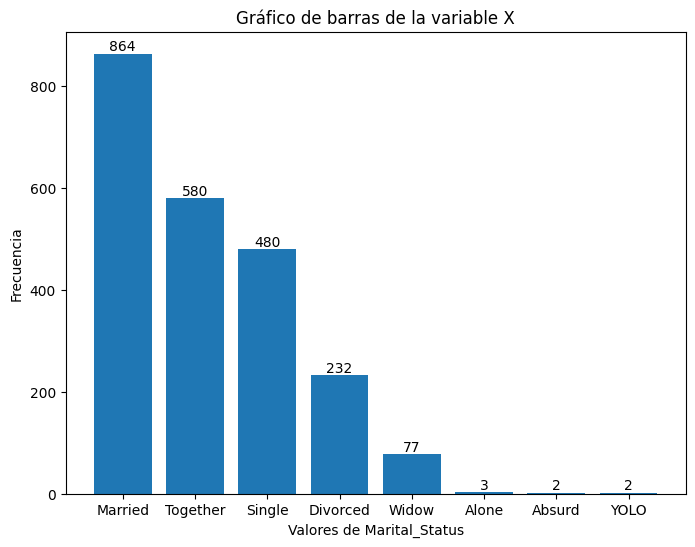

In [18]:
# Contar la frecuencia de cada valor único en la columna 'X'
frecuencia_valores= datos['Marital_Status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico (opcional)
barras = plt.bar(frecuencia_valores.index, frecuencia_valores.values)  # Guardar las barras en una variable


# Añadir etiquetas de texto encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, str(altura), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel("Valores de Marital_Status")
plt.ylabel("Frecuencia")
plt.title("Gráfico de barras de la variable X")

# Mostrar el gráfico
plt.show()

### Income

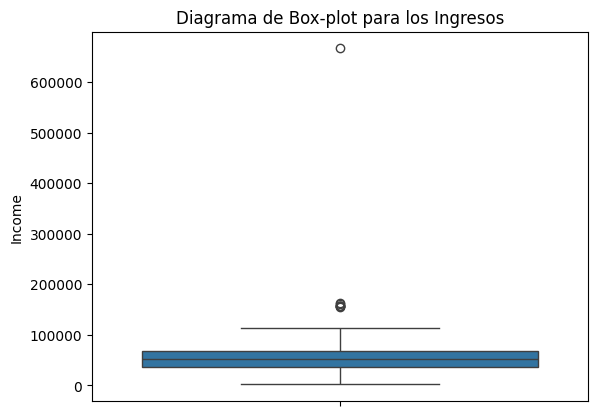

In [19]:
# Crear el diagrama de Box-plot
sns.boxplot(y=datos['Income'])  # Usa 'y' para un boxplot vertical

# Agregar título y etiquetas
plt.title('Diagrama de Box-plot para los Ingresos')

# Mostrar el diagrama
plt.show()

***Analisis de Boxplot***

El boxplot muestra que la mayoría de los ingresos están concentrados dentro de un rango razonable, con la mediana ubicada cerca del centro de la caja, lo que indica una distribución relativamente balanceada en este rango. Sin embargo, se identifican valores atípicos destacados, incluyendo un ingreso superior a los 600,000, que sobresalen significativamente del rango intercuartil representado por los bigotes. Estos outliers extremos, especialmente los ingresos muy altos, podrían distorsionar las métricas como el promedio, por lo que sería necesario realizar un análisis adicional o aplicar transformaciones para garantizar una evaluación más precisa de los datos.

# Queries

Cual es la edad y el ingreso de los de los clientes que aceptaron las campañas?
* Edad promedio: 55
* Ingreso promedio: 60.209

In [20]:
# Supongamos que tu DataFrame se llama 'df'
datos['Age'] = 2025 - datos['Year_Birth']

# Supongamos que tu DataFrame se llama 'df'
grouped_datos = datos.groupby('Response').agg(
    mean_age=('Age', 'mean'),
    mean_income=('Income', 'mean')
)

print(grouped_datos)

           mean_age   mean_income
Response                         
0         56.301154  50839.132767
1         55.583832  60209.675676


Cuanto gastaron rn promedio las personas de acuerdo a su estado civil?

In [21]:
# Definir las columnas de gasto
categorias_gasto = ['MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Agrupar por estado civil y calcular el promedio de gasto en cada categoría
gasto_promedio_estado_civil = datos.groupby('Marital_Status')[categorias_gasto].mean()

# Imprimir el resultado
print(gasto_promedio_estado_civil)

                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Marital_Status                                                            
Absurd          355.500000  84.500000       312.500000       205.500000   
Alone           184.666667   4.000000        26.333333         7.666667   
Divorced        324.844828  27.426724       150.206897        35.043103   
Married         299.480324  25.734954       160.681713        35.380787   
Single          288.331250  26.835417       182.108333        38.216667   
Together        306.825862  25.350000       168.103448        38.991379   
Widow           369.272727  33.090909       189.285714        51.389610   
YOLO            322.000000   3.000000        50.000000         4.000000   

                MntSweetProducts  MntGoldProds  
Marital_Status                                  
Absurd                 30.500000    204.000000  
Alone                   7.000000     27.000000  
Divorced               26.818966     46.288793  
Marr

Entre mas gana una persona mas dinero gasta?

In [22]:
# Sumar los gastos en todas las categorías para obtener el gasto total
datos['TotalSpent'] = datos[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
# Calcular la correlación entre ingresos y gasto total
correlation = datos['Income'].corr(datos['TotalSpent'])
print(f"Correlación entre ingresos y gasto total: {correlation}")

Correlación entre ingresos y gasto total: 0.667576090388828


Las personas con ingresos mas altos consumen mas vino?

In [23]:
# Calcular la correlación entre ingresos y gasto en vinos
correlation = datos['Income'].corr(datos['MntWines'])
print(f"Correlación entre ingresos y gasto en vinos: {correlation}")

Correlación entre ingresos y gasto en vinos: 0.5786497501367384


# Correlation Matrix

En este caso de estudio, podemos planear la organización de los productos de la tienda de acuerdo a la correlación entre las compras de estos.
Observamos que los productos con mayor correlación son:
* Fruits & Fish
* Meat & wine
* Meat & Fruits
* Meat & Fish
* Fruits & Sweet products
* Sweet products & Fish

Una estrategia que se puede realizar es ubicar estos productos en ubicaciones cercanas, de esta forma aseguramos la compra de estos productos.

In [24]:
df_cat= datos[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

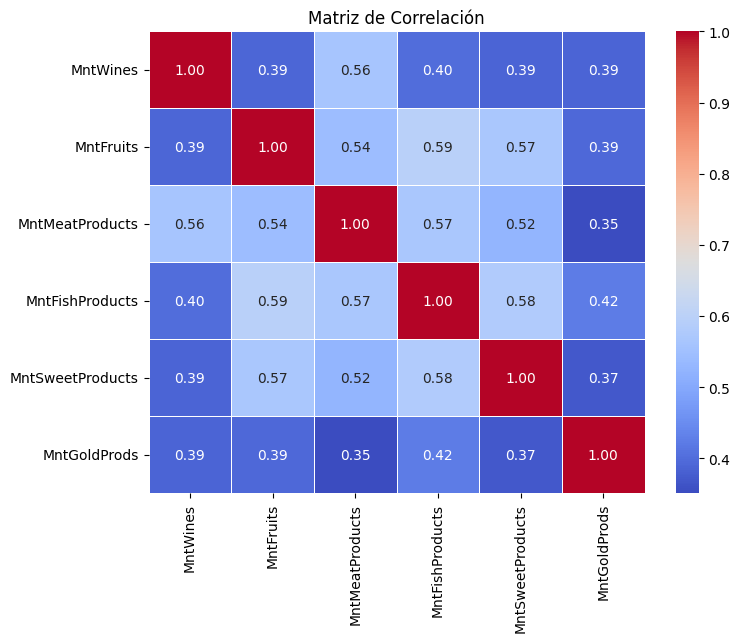

In [25]:
corr_matrix = df_cat.corr()
plt.figure(figsize=(8,6))  # Ajusta el tamaño del gráfico
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Outliers detection

## Income Visualization

Text(0.5, 1.0, 'Histograma de Income')

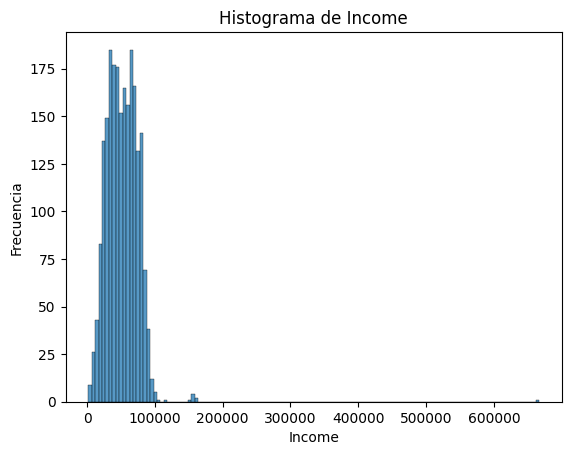

In [26]:
sns.histplot(datos["Income"])
plt.xlabel("Income")
plt.ylabel("Frecuencia")
plt.title("Histograma de Income")

Text(0.5, 1.0, 'Boxplot de Income')

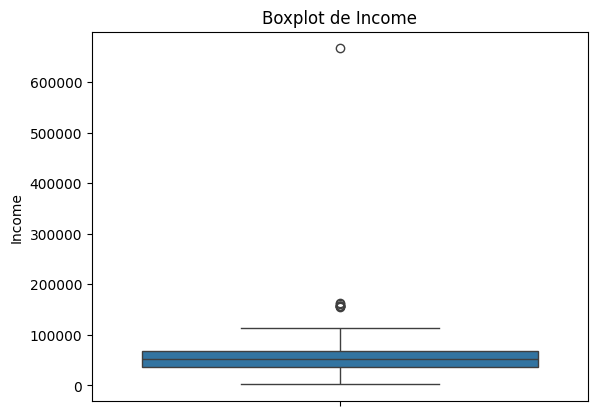

In [27]:
sns.boxplot(datos["Income"])
plt.xlabel("")
plt.ylabel("Income")
plt.title("Boxplot de Income")

In [28]:
def outliers_iqr(variable):
    """
    Con esta función obtenemos los valores atípicos con el método de IQR
    """
    Q1 = variable.quantile(0.25)  # calculamos el Q1
    Q3 = variable.quantile(0.75)  # Calculamos el Q3
    IQR = Q3 - Q1  # Calculamos el rango inter quantil
    # Obtenemos los límites
    lower_bound = Q1 - 1.5 * IQR  # límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior
    outliers = np.where((variable < lower_bound) | (variable > upper_bound), 1, 0)  # 1 atípico
    return outliers  # Retornamos la etiqueta de atípico

Atipico_Income_IQR
0    2232
1       8
Name: count, dtype: int64


<Axes: xlabel='Atipico_Income_IQR', ylabel='Income'>

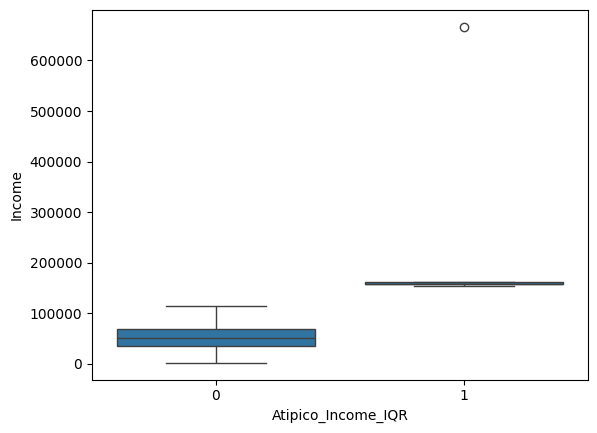

In [32]:
datos["Atipico_Income_IQR"] = outliers_iqr(datos["Income"]) # Guardamos los outliers de Income en una variable nueva
print(datos["Atipico_Income_IQR"].value_counts())
sns.boxplot(datos, y="Income", x= "Atipico_Income_IQR")

In [35]:
datos. head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Tiene_hijo,Age,TotalSpent,Atipico_Income_IQR
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,False,68,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,True,71,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,False,60,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,True,41,53,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,True,44,422,0


# K-means

Standardize variables

In [45]:
#Seleccionamos las variables
df_var= datos[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [46]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_var)
scaled_features

array([[ 0.98378127,  1.55157698,  1.67970233,  2.46214705,  1.4765001 ,
         0.84320691],
       [-0.87047948, -0.63630116, -0.71322541, -0.65044925, -0.63150318,
        -0.72900579],
       [ 0.36272278,  0.57080402, -0.17703234,  1.34527426, -0.14690472,
        -0.03876607],
       ...,
       [ 1.79502034,  0.545656  ,  0.22178895, -0.10116755, -0.36497403,
        -0.38388593],
       [ 0.36866592,  0.09299156,  0.20849491,  0.77768317,  0.07116458,
         0.32552712],
       [-0.65355475, -0.58600511, -0.46950129, -0.65044925, -0.63150318,
        -0.4414059 ]])

Establecemos el parametro de K-means

In [47]:
kmeans = KMeans(
  init="random", # Este parámetro determina donde se ubican los centroides inicialmente
  n_clusters=3, # Corresponde al número de clusters que se van a crear
  n_init=10, # El número de veces que se iniciarán los centroides para seleccionar los mejores, según la inercia
  max_iter=300, # Número máximo de iteraciones para encontrar los clusters optimos
  random_state=42 # Este valor asegura que los resultados son reproducibles
  )

In [48]:
kmeans.fit(scaled_features)   #Ajustamos el modelo

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

**Inertia**

Es la medida de la suma de las distancias al cuadrado entre cada punto y el centroide. Entre menor sea este valor, generalmente indica una mejor clusterización.


In [49]:
kmeans.inertia_

6318.427062664645

In [50]:
kmeans.cluster_centers_ # Muestra los centroides de los 3 clusters

array([[-0.61908361, -0.5003944 , -0.58326963, -0.52166902, -0.50138979,
        -0.48639229],
       [ 0.64041779,  1.5888154 ,  1.20150635,  1.63535737,  1.66514736,
         0.88281773],
       [ 1.02390537,  0.13750133,  0.5793242 ,  0.15688142,  0.09063429,
         0.55984891]])

**Standardize reversion**

Standardize centers works well for K-means process, but at the moment of interpretate in the original context is better manage them in the original scale.

In [51]:
standardized_centroids = kmeans.cluster_centers_

original_centroids = scaler.inverse_transform(standardized_centroids)
original_centroids

array([[ 95.60030511,   6.40427155,  35.32646834,   9.03356217,
          6.36994661,  18.65369947],
       [519.45054945,  89.48076923, 438.08791209, 126.84340659,
         95.78571429,  90.06593407],
       [648.50265487,  31.7699115 , 297.68318584,  46.09380531,
         30.80353982,  73.22123894]])

Vamos a visualizar en que cluster quedaron los datos

In [54]:
labels = kmeans.predict(scaled_features)
datos['cluster'] = labels
datos

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Tiene_hijo,Age,TotalSpent,Atipico_Income_IQR,cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,False,68,1617,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,True,71,27,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,False,60,776,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,True,41,53,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,True,44,422,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,3,11,0,False,58,1341,0,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,3,11,0,True,79,444,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,3,11,0,False,44,1241,0,2
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,3,11,0,False,69,843,0,2


Determinación del numero de clusters - Elbow Method

XCSS: Es una metrica que mide la suma de las distancias al cuadrado entre cada punto y el centroide asignado.

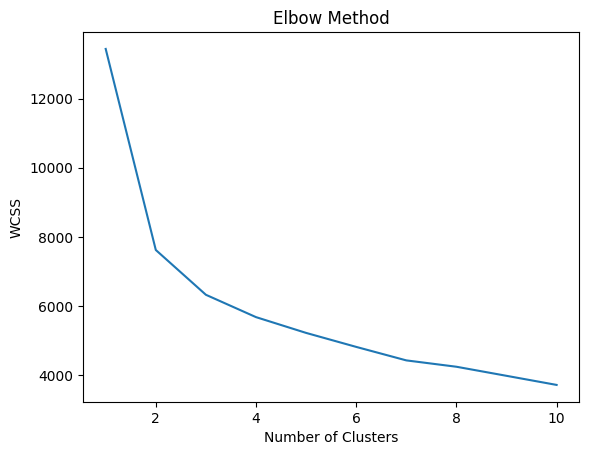

In [55]:
wcss = [] # crear una lista para almacenar los valores de WCSS

# Calcular el WCSS para diferentes valores de k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Observación: Over the cluster number 3, our WCSS stabilizes